In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 

In [22]:
##Read the dataset
df = pd.read_csv("linear_height_weight.csv")
df.head()

,Height_cm,Weight_kg
0,150.000000,45.993428
1,150.816327,45.131635
2,151.632653,47.111704
3,152.448980,49.270550
4,153.265306,46.164346


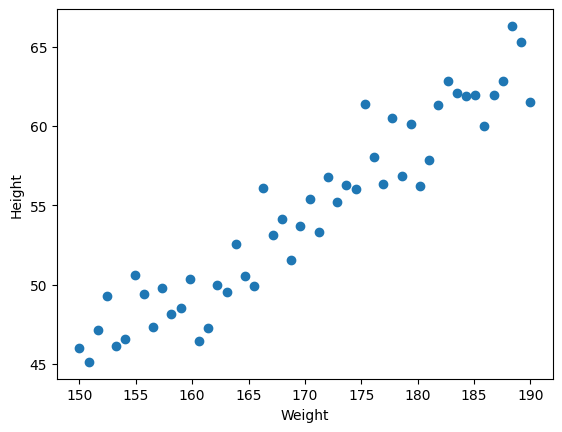

In [23]:
plt.scatter(df['Height_cm'],df['Weight_kg'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()


In [38]:
##train test split
X = df[['Weight_kg']] ##independent 
Y = df['Height_cm'] ##dependent 

In [35]:
import sklearn
from sklearn.model_selection import train_test_split


In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

In [27]:
X.shape

(50,)

In [31]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()
X_train = pd.DataFrame(X_train) ##to make it 2-D
X_test = pd.DataFrame(X_test)

In [ ]:
X_train = scaler.fit_transform(X_train)  ##fit->mean and varirance ##reansform->z-score

In [44]:
X_train

array([[ 1.3019288 ],
       [-0.98925778],
       [-0.78584151],
       [ 0.17464647],
       [-0.64198607],
       [-0.74528811],
       [ 0.31487587],
       [-1.19805091],
       [-0.6549536 ],
       [-0.30983243],
       [-1.34156395],
       [ 1.84453626],
       [-0.04758617],
       [-1.39498601],
       [ 1.27654579],
       [-0.7567074 ],
       [ 1.43357955],
       [ 0.58612254],
       [-0.82882778],
       [-0.11664759],
       [ 0.41498299],
       [-1.20854283],
       [ 0.95021305],
       [-1.23442996],
       [-0.18391251],
       [-0.84796821],
       [ 1.42497535],
       [ 1.17222054],
       [ 1.17993649],
       [-0.216178  ],
       [ 0.61669601],
       [ 0.27896988],
       [ 2.01720782],
       [ 0.96876495],
       [ 0.30290283],
       [-1.05764872],
       [-0.86855346],
       [ 1.27381754],
       [-1.42395282],
       [-0.68020696]])

In [50]:
X_test = scaler.fit_transform(X_test)

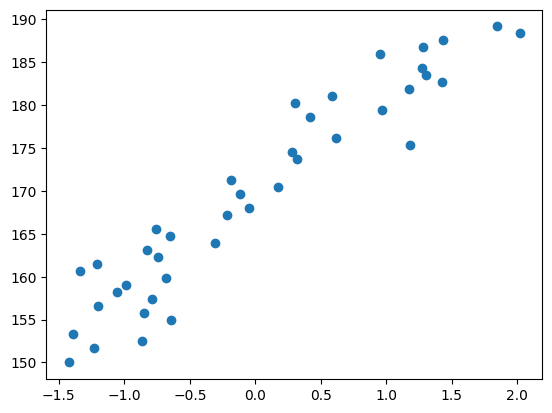

In [51]:
plt.scatter(X_train,Y_train)

In [52]:
##train our model (this will helps us to find the THE BEST FIT LINE)
from sklearn.linear_model import LinearRegression

In [54]:
regressor = LinearRegression()

In [55]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [57]:
regressor.coef_  ##Since there is only one independent feature feature so there will be only one SLOPE
##SO BELOW IS MY SLOPE
print("The slope or coefficient of weight is ", regressor.coef_)

The slope or coefficient of weight is  [11.2056531]


In [58]:
print("Intercept: ", regressor.intercept_)

Intercept:  169.6326530612245


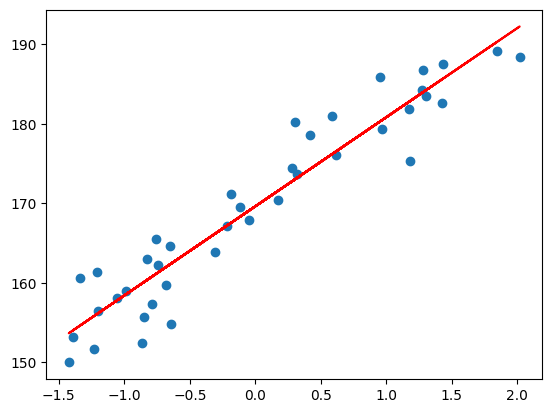

In [61]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regressor.predict(X_train),'r') ##there are the input points in y = mx+c we have m,c plotting x to get a line 

In [ ]:
### prediction of train data
###y_pred_train = 169.23 + 11.20(X_train)###

### prediction of test data 
###y_pred_test = 169.23 + 11.20(X_test)

In [62]:
Y_pred_test = regressor.predict(X_test)

In [63]:
Y_pred_test,Y_test

(array([183.35426576, 172.88498209, 172.04000232, 171.51542061,
        180.47016771, 149.34547479, 152.25937209, 169.76157329,
        162.30136633, 182.39390561]),
 43    185.102041
 27    172.040816
 33    176.938776
 20    166.326531
 34    177.755102
 1     150.816327
 5     154.081633
 28    172.857143
 23    168.775510
 49    190.000000
 Name: Height_cm, dtype: float64)

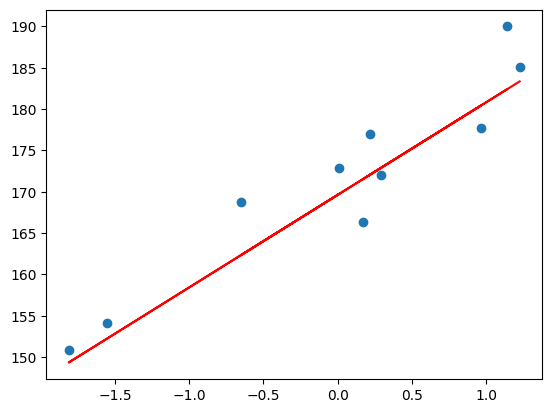

In [64]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

Performance metrics 
MSE,MAE,RMSE
R sq and adjusted r sq

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [66]:
mse = mean_squared_error(Y_test,Y_pred_test)
mae = mean_absolute_error(Y_pred_test,Y_test)
rms = np.sqrt(mse)
print(mse)
print(mae)
print(rms)

17.689527332230618
3.5863589808101524
4.205891978193284


In [ ]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,Y_pred_test)
score #this tells the accuracy of the model get to know the formula of r2score

0.8702636872443742

In [69]:
##there is something adjusted r2score too

In [72]:
##supose new data is 80 
scaled_weight = scaler.transform([[80]])
scaled_weight

c:\Users\hp\OneDrive\Desktop\ML\myvenvv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[4.48219266]])

In [77]:
print("The prediction for height with 80 kgs weight is ",regressor.predict([scaled_weight[0]]))

The prediction for height with 80 kgs weight is  [219.85854917]


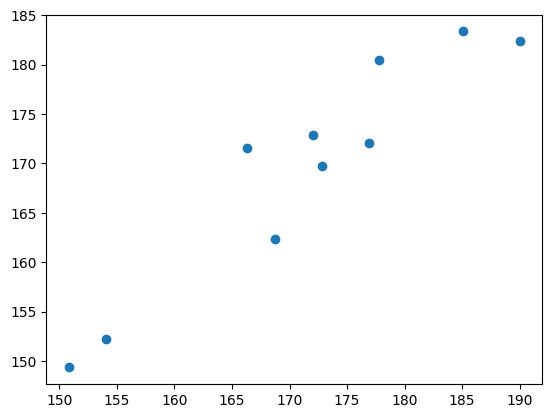

In [78]:
plt.scatter(Y_test,Y_pred_test)

In [79]:
residuals = Y_test - Y_pred_test
print(residuals)

43    1.747775
27   -0.844166
33    4.898773
20   -5.188890
34   -2.715066
1     1.470852
5     1.822261
28    3.095570
23    6.474144
49    7.606094
Name: Height_cm, dtype: float64
